# Wine Recommendation System

by Prateek keerthi(01119787) and Bisi Adeniran (01108146)

**Dataset**: https://www.kaggle.com/zynicide/wine-reviews#winemag-data-130k-v2.csv

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import pandas_datareader.data as web
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import pandas_datareader.data as web
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from datetime import datetime
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
wine130k = pd.read_csv("resources/winemag130k.csv",index_col=0)

In [4]:
wine130k.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
wine130k.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,129908,43,US,54504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,129971,119955,This zesty red has pretty aromas that suggest ...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,92506,37979,Reserve,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,129971,NaN,NaN,NaN,88.4471,3.03973,80,86,88,91,100
price,120975,NaN,NaN,NaN,35.3634,41.0222,4,17,25,42,3300
province,129908,425,California,36247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,108724,1229,Napa Valley,4480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,50511,17,Central Coast,11065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,103727,19,Roger Voss,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_twitter_handle,98758,15,@vossroger,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
wine130k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


As we see that most of the columns are of object data type, we tried to use as much as float and int data columns for exploratory data analysis.

## Exploratory Data Analysis

### Finding out the relationship between Price and Points¶


In [7]:
Price=wine130k['price']

In [8]:
Points=wine130k['points']

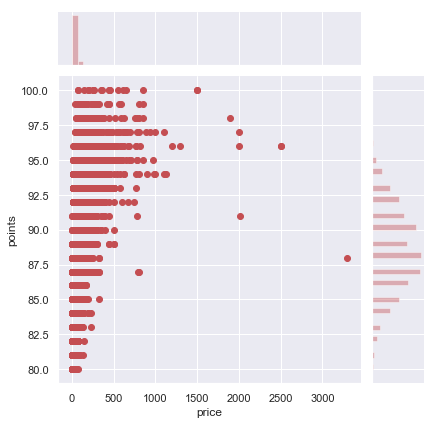

In [10]:
import warnings
warnings.simplefilter("ignore")
sns.jointplot( x = wine130k['price'],y = wine130k['points'],color='r');

We see that the minimum points that are given by the user is 80 and the price of maximum wines are below 500

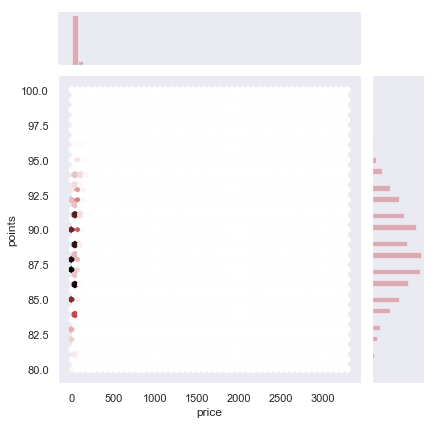

In [11]:
import warnings
warnings.filterwarnings('ignore')
with sns.axes_style("dark"):
    sns.jointplot(x=Price, y=Points, data=wine130k, kind="hex", color="r")

In [12]:
corelation=wine130k.corr()
corelation

,points,price
points,1.000000,0.416167
price,0.416167,1.000000


In [13]:
# plt.figure(figsize=(14, 13))
# plt.imshow(corelation, cmap='brg', interpolation='none', aspect='auto')
# plt.colorbar()
# plt.xticks(range(len(corelation)), corelation.columns, rotation='vertical')
# plt.yticks(range(len(corelation)), corelation.columns);
# plt.suptitle('Heat Map', fontsize=19)
# plt.show()

### Count of Wine Reviews by different countries

In [14]:
count = wine130k['country'].value_counts().to_frame()[0:16]
dfgr8tr = (count['country'] >146)
print(dfgr8tr)

US               True
France           True
Italy            True
Spain            True
Portugal         True
Chile            True
Argentina        True
Austria          True
Australia        True
Germany          True
New Zealand      True
South Africa     True
Israel           True
Greece           True
Canada           True
Hungary         False
Name: country, dtype: bool


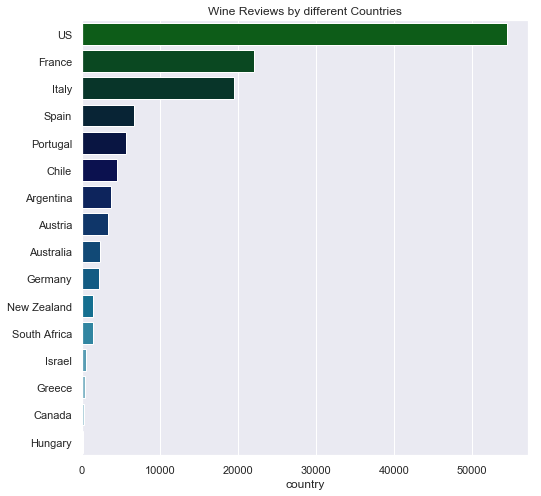

In [15]:
plt.figure(figsize=(8, 8))
sns.barplot(x= count['country'], y =count.index, data=count, palette='ocean',orient='h')
plt.title('Wine Reviews by different Countries');

US has given maximun number of reviews and hungary has given the least

###  Total number of points given by different users

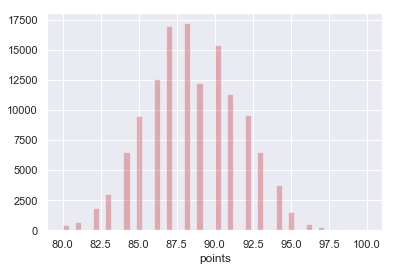

In [16]:
sns.distplot(wine130k['points'], color='r', kde=False);

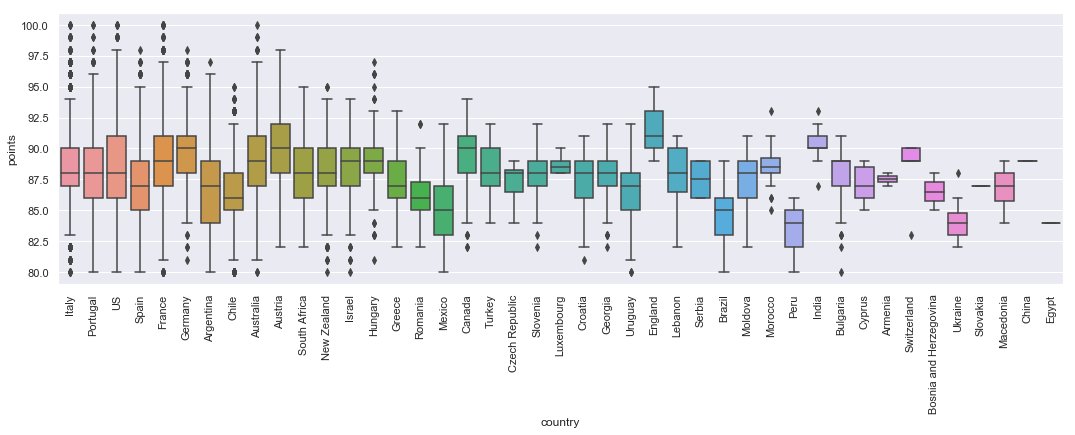

In [17]:
plt.figure(figsize=(18, 5))
sns.boxplot(x=wine130k['country'], y=wine130k['points'], data=wine130k);
plt.xticks(rotation=90);


* Most of the ratings are between 87.5 and 90.0
* England has topped the table of having the highest average rating of the wine

In [18]:
# fig = plt.subplots(figsize=(16,8))
# count = wine130k.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:10]
# sns.barplot(x = count['points'], y = count.index, palette= 'GnBu_d')
# plt.title("varieties with most highest points")

* It is seen that all the varieties have atleast minimum of 80 points.

### Relation between Price and Variety(expensivity)

Text(0.5, 1.0, 'varieties with most expensive wine')

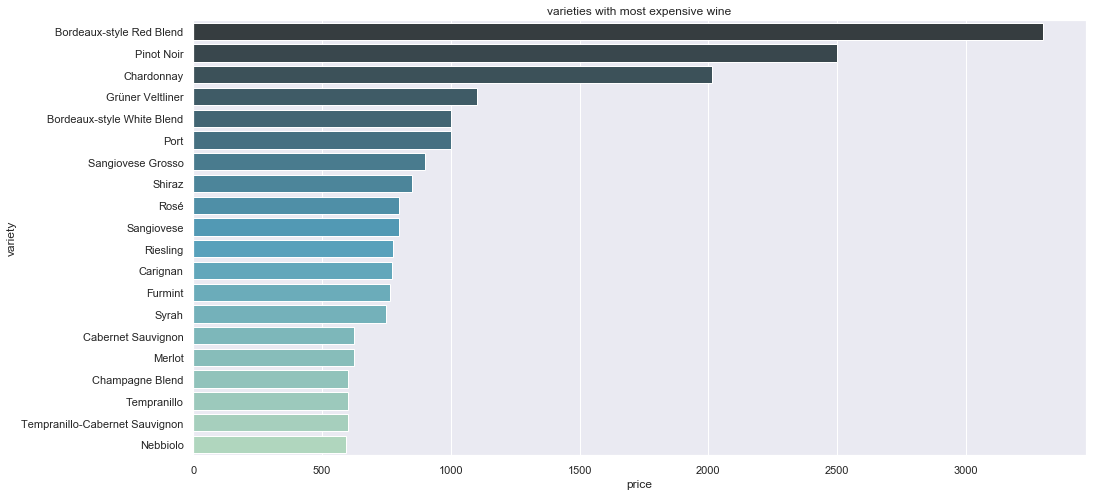

In [17]:
fig = plt.subplots(figsize=(16,8))
count = wine130k.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:20]
sns.barplot(x = count['price'], y = count.index, palette= 'GnBu_d')
plt.title("varieties with most expensive wine")



* Bordeaux-style Red Blend is the one that is most expensive

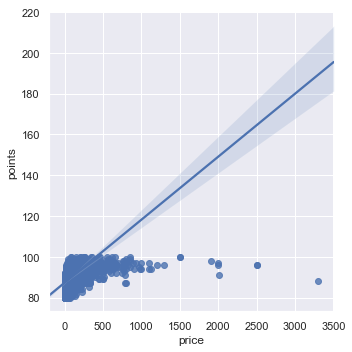

In [18]:
sns.lmplot(x="price", y="points", data=wine130k)

* It is seen that most of the wines prices are between 0 to 1000
* The wine with highest price is 3300  
* The minimum rating points that are given to the wine starts from 80

### Winery with price.

Text(0.5, 1.0, 'The most expensive wine is prepared in')

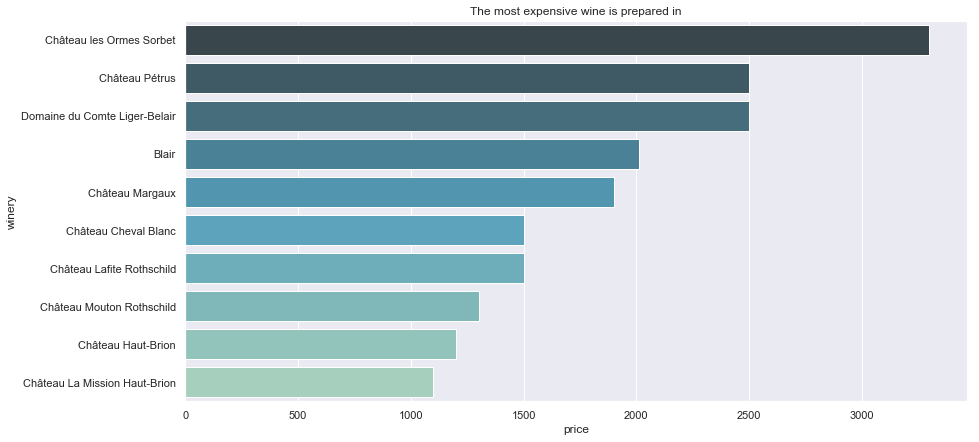

In [86]:
plt.subplots(figsize=(14,7))
count = wine130k.groupby(['winery'])['price'].max().to_frame().sort_values(by='price',ascending=False)[:10]
sns.barplot(count['price'],y = count.index,palette = 'GnBu_d')
plt.title('The most expensive wine is prepared in')


### Province with price and points 

Text(0.5, 1.0, 'The most expensive wine is prepared in the province')

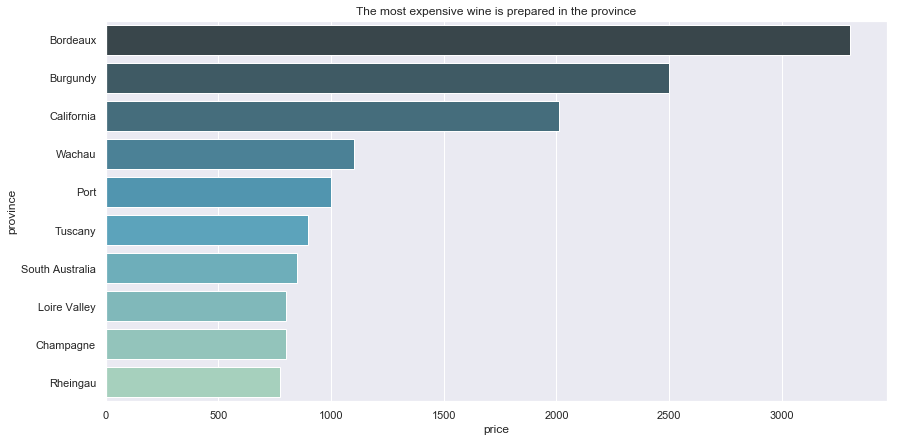

In [87]:
#which province produced the more expensive wines?


plt.subplots(figsize=(14,7))
count = wine130k.groupby(['province'])['price'].max().to_frame().sort_values(by='price',ascending=False)[:10]
sns.barplot(count['price'],y = count.index,palette = 'GnBu_d')
plt.title('The most expensive wine is prepared in the province')


Text(0.5, 1.0, 'The least price wine is prepared in the province')

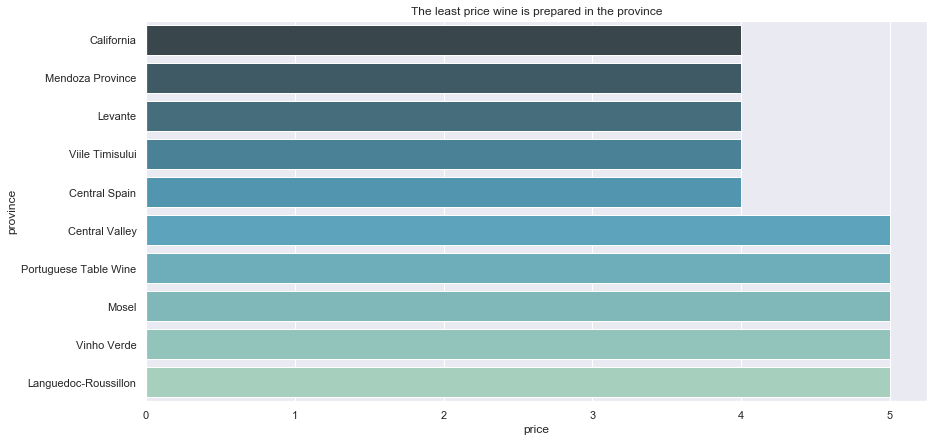

In [88]:
plt.subplots(figsize=(14,7))
count = wine130k.groupby(['province'])['price'].min().to_frame().sort_values(by='price')[:10]
sns.barplot(count['price'],y = count.index,palette = 'GnBu_d')
plt.title('The least price wine is prepared in the province')

In [127]:
count = wine130k.groupby(['province','variety','points'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending= False)[:10]
count.reset_index(inplace=True)
count.style.background_gradient(cmap='Reds',high=2)

,province,variety,points,count,min,max,mean
0,Bordeaux,Bordeaux-style Red Blend,100,4,150,1500,877.25
1,South Australia,Shiraz,99,1,850,850,850
2,Bordeaux,Bordeaux-style White Blend,100,1,848,848,848
3,Champagne,Chardonnay,99,1,800,800,800
4,Rheingau,Riesling,98,1,775,775,775
5,Tokaji,Furmint,94,1,764,764,764
6,Bordeaux,Bordeaux-style Red Blend,98,4,92,1900,683
7,Port,Port,100,1,650,650,650
8,Champagne,Chardonnay,100,1,617,617,617
9,Northern Spain,Tempranillo-Cabernet Sauvignon,92,1,600,600,600


In [129]:
count = wine130k.groupby(['taster_name','variety'])['points'].agg(['count','min','max','mean']).sort_values(by='mean',ascending= False)[:10]
count.reset_index(inplace=True)
count.style.background_gradient(cmap='Blues', high=2)

,taster_name,variety,count,min,max,mean
0,Joe Czerwinski,Cabernet-Shiraz,1,96,96,96
1,Michael Schachner,Tinta del Pais,2,94,96,95
2,Anne Krebiehl MW,Gelber Traminer,1,95,95,95
3,Matt Kettmann,Monastrell,1,95,95,95
4,Roger Voss,Terrantez,1,95,95,95
5,Matt Kettmann,Grenache Blend,1,95,95,95
6,Roger Voss,Bual,7,92,98,94.1429
7,Matt Kettmann,Syrah-Petit Verdot,1,94,94,94
8,Joe Czerwinski,Muscadelle,6,89,99,94
9,Matt Kettmann,Mourvèdre-Syrah,1,94,94,94


## Modelling

###  Using KNN

In [91]:
wine130k = pd.read_csv("resources/winemag130k.csv",index_col=0)

In [92]:
winenew = wine130k.copy()

In [93]:
#predictng wine based on province variety and points
col = ['province','variety','points']
rec_wine = winenew[col]

In [94]:
rec_wine

,province,variety,points
0,Sicily & Sardinia,White Blend,87
1,Douro,Portuguese Red,87
2,Oregon,Pinot Gris,87
3,Michigan,Riesling,87
4,Oregon,Pinot Noir,87
5,Northern Spain,Tempranillo-Merlot,87
6,Sicily & Sardinia,Frappato,87
7,Alsace,Gewürztraminer,87
8,Rheinhessen,Gewürztraminer,87
9,Alsace,Pinot Gris,87


In [95]:
rec_wine = rec_wine.dropna(axis=0, subset=['points'])
rec_wine = rec_wine.dropna(axis=0, subset=['variety'])
rec_wine = rec_wine.dropna(axis=0, subset=['province'])
rec_wine = rec_wine.drop_duplicates(['variety','province'])

In [109]:
#picking up the wines that have ratings greater than 90
rec_wine = rec_wine[rec_wine['points'] >90]

In [110]:
rec_wine.head(10)

,province,variety,points
119,Alsace,Riesling,92
120,Piedmont,Nebbiolo,92
123,South Australia,Shiraz-Cabernet Sauvignon,92
125,Stellenbosch,Cabernet Sauvignon,91
127,Alsace,White Blend,91
128,Alsace,Pinot Blanc,91
129,Stellenbosch,Bordeaux-style Red Blend,91
131,Alsace,Alsace white blend,91
132,Simonsberg-Stellenbosch,Cabernet Sauvignon,91
136,Bordeaux,Bordeaux-style Red Blend,91


In [111]:
#creating matrix with indx -variety , province as columns and points as values 
wine = rec_wine.pivot(index= 'variety',columns='province',values='points').fillna(0)

In [112]:
wine.head()

province,Aconcagua Valley,Aegean,Alentejano,Alentejo,Alsace,Andalucia,Ankara,Apalta,Atalanti Valley,Austria,...,Waipara,Walker Bay,Washington,Weinland Österreich,Weinviertel,Western Australia,Wiener Gemischter Satz,Württemberg,Zenata,Österreichischer Sekt
variety,,,,,,,,,,,,,,,,,,,,,
Aglianico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alfrocheiro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alicante Bouschet,0.0,0.0,92.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aligoté,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alsace white blend,0.0,0.0,0.0,0.0,91.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
wine_matrix = csr_matrix(wine)

In [114]:
print(wine_matrix)

  (0, 24)	91.0
  (0, 65)	91.0
  (1, 141)	91.0
  (2, 2)	92.0
  (2, 3)	92.0
  (3, 24)	91.0
  (4, 4)	91.0
  (5, 110)	91.0
  (6, 120)	91.0
  (7, 2)	91.0
  (8, 115)	92.0
  (8, 128)	91.0
  (9, 8)	91.0
  (10, 21)	92.0
  (10, 27)	92.0
  (11, 96)	92.0
  (11, 154)	93.0
  (11, 168)	91.0
  (12, 10)	91.0
  (13, 134)	92.0
  (14, 54)	91.0
  (15, 13)	93.0
  (16, 11)	91.0
  (16, 13)	91.0
  (17, 24)	92.0
  :	:
  (220, 2)	91.0
  (220, 132)	91.0
  (220, 153)	92.0
  (221, 24)	91.0
  (222, 24)	92.0
  (222, 164)	94.0
  (223, 97)	91.0
  (224, 98)	92.0
  (225, 21)	93.0
  (225, 73)	92.0
  (225, 143)	91.0
  (225, 158)	93.0
  (225, 159)	92.0
  (226, 2)	91.0
  (226, 4)	91.0
  (226, 17)	92.0
  (226, 117)	92.0
  (226, 133)	91.0
  (226, 138)	93.0
  (226, 143)	92.0
  (226, 158)	92.0
  (227, 24)	92.0
  (228, 24)	94.0
  (229, 143)	91.0
  (230, 27)	92.0


In [115]:
# use of 2 recommender systems two for predicting. Cosine similarity and matrix factorization
# In this case we'll be using cosine similarity as we have small data
# all the points here will be between 0 to 1

sim=cosine_similarity(wine_matrix)

In [116]:
print('pairwise dense output:\n {}\n'.format(sim))

pairwise dense output:
 [[1.         0.         0.         ... 0.70710678 0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.70710678 0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]



In [118]:
knn = NearestNeighbors(n_neighbors=6,algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(wine_matrix)

In [122]:
query_index = np.random.choice(wine.shape[0])
dist, ind= model_knn.kneighbors(wine.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)
for i in range(0, len(dist.flatten())):
    if  i == 0:
        print('Recommendations for {0}:\n'.format(wine.index[query_index]))
    else:
        print('{1} with a distance of: {2}'.format(i,wine.index[ind.flatten()[i]],dist.flatten()[i]))

Recommendations for Spätburgunder:

Rieslaner with a distance of: 0.4185114499054323
Grauburgunder with a distance of: 0.4310165800149929
Scheurebe with a distance of: 0.6787104002199903
White Blend with a distance of: 0.7982910878831756
Sparkling Blend with a distance of: 0.816125864337855


## Evaluation

In [41]:
# to find the accuracy of the system, we use mean square error.With this,
#the actual rating -  predicted rating is calc
error = []
for query_index in range(wine.shape[0]):
    dist, ind= model_knn.kneighbors(wine.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

    actual_rating = wine130k['points'][wine130k['variety'] == wine.index[query_index]].mean()
    predicted_rating = wine130k['points'][wine130k['variety'].isin(list(wine.index[ind.flatten()][1:]))].mean()
    error.append(actual_rating - predicted_rating)

In [42]:
error

[1.3653182555190568,
 -0.2456162324649256,
 1.8781145305804472,
 -2.000294985250733,
 1.7721362229102198,
 0.12201407117088081,
 0.04795321637426753,
 -1.0133707324718557,
 1.1187041412759697,
 2.294414735591218,
 0.8797653958944238,
 0.687217832957117,
 1.765337586390217,
 3.538293216630194,
 1.9571428571428555,
 1.3300078652150518,
 2.1940515052593383,
 2.56637168141593,
 4.418604651162795,
 1.7615517241379308,
 -2.1770450042456844,
 0.8532958744722805,
 -0.050309221040933494,
 1.0674603174603163,
 0.7269841269841208,
 5.31139646869984,
 -0.1812570145903436,
 0.5762824040561441,
 -1.7541666666666629,
 2.261904761904759,
 -0.02323943661971839,
 -0.43847520061372336,
 0.26532421479230095,
 -2.5845410628019323,
 0.7051282051282044,
 2.3723270440251554,
 0.19595490716180564,
 -0.05807801156637993,
 0.22883787661405108,
 3.705660377358484,
 4.715767002134797,
 1.8541941150636916,
 2.187789275080334,
 1.5988304093567223,
 -1.824602046402319,
 -0.5269871721452262,
 0.017985200189485795,
 3.

In [43]:

(np.array(error)**2).mean()/wine130k['points'].max()

0.04525655262656749

## Collaborative Filtering

In [44]:
# In order to improve the above model we use collaborative system which is based on the ratings given by different users
# here we depolyed the concept of normalization to improve effeciency of the model
# converting all  values to a scale of -0.5 to 0.5

In [41]:
wine_data_130k = pd.read_csv("resources/winemag130k.csv", index_col = 0)

In [42]:
wine_data_130k

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


* Consider taster name(user) and variety(item) and points(ratings) for building recommender system

In [43]:
new_data = wine_data_130k[["taster_name", "variety", "points"]].dropna()

In [44]:
#explain how you arrived at the avg points 
ratings_dict = {"taster_name": [], "variety": [], "avg_points": []}
for taster in set(new_data["taster_name"].values):
    print(taster)
    for variety in set(new_data["variety"].values):
        points_df = new_data.loc[(new_data["taster_name"] == taster) & (new_data["variety"] == variety)]
        if len(points_df) > 0:
            points_mean = points_df["points"].mean()
            ratings_dict["taster_name"].append(taster)
            ratings_dict["variety"].append(variety)
            ratings_dict["avg_points"].append(points_mean)
        

Alexander Peartree
Kerin O’Keefe
Carrie Dykes
Virginie Boone
Matt Kettmann
Sean P. Sullivan
Roger Voss
Jim Gordon
Susan Kostrzewa
Anna Lee C. Iijima
Christina Pickard
Paul Gregutt
Fiona Adams
Joe Czerwinski
Anne Krebiehl MW
Lauren Buzzeo
Jeff Jenssen
Michael Schachner
Mike DeSimone


In [45]:
ratings_df = pd.DataFrame.from_dict(ratings_dict)

In [46]:

ratings_df

,taster_name,variety,avg_points
0,Alexander Peartree,Malbec,87.500000
1,Alexander Peartree,Sherry,86.000000
2,Alexander Peartree,Sangiovese,84.800000
3,Alexander Peartree,Aglianico,84.000000
4,Alexander Peartree,Pinot Noir,87.000000
5,Alexander Peartree,Merlot-Cabernet Franc,88.000000
6,Alexander Peartree,Primitivo,85.000000
7,Alexander Peartree,Cabernet Sauvignon,86.625000
8,Alexander Peartree,Vignoles,88.000000
9,Alexander Peartree,Pinot Grigio,83.750000


* normalize the ratings

In [47]:
def normalize(row):
    max_value = ratings_df[ratings_df["taster_name"] == row["taster_name"]]["avg_points"].max()
    min_value = ratings_df[ratings_df["taster_name"] == row["taster_name"]]["avg_points"].min()
    return (row["avg_points"] - min_value)/(max_value - min_value) - 0.5


In [48]:
ratings_df["normalized_avg_points"] = ratings_df.apply(normalize, axis=1)

In [49]:
ratings_df

,taster_name,variety,avg_points,normalized_avg_points
0,Alexander Peartree,Malbec,87.500000,0.142857
1,Alexander Peartree,Sherry,86.000000,-0.071429
2,Alexander Peartree,Sangiovese,84.800000,-0.242857
3,Alexander Peartree,Aglianico,84.000000,-0.357143
4,Alexander Peartree,Pinot Noir,87.000000,0.071429
5,Alexander Peartree,Merlot-Cabernet Franc,88.000000,0.214286
6,Alexander Peartree,Primitivo,85.000000,-0.214286
7,Alexander Peartree,Cabernet Sauvignon,86.625000,0.017857
8,Alexander Peartree,Vignoles,88.000000,0.214286
9,Alexander Peartree,Pinot Grigio,83.750000,-0.392857


* get indices of dataframe
* shuffle indices randomly
* split indices into train and test indices with 80% and 20% respectively

In [50]:
indices = np.array(ratings_df.index)

np.random.shuffle(indices)

train_indices = indices[:round(len(indices)*0.8)]
test_indices = indices[round(len(indices)*0.8):]

* make a ratings matrix from training indices 
* fill none values with zeros

In [51]:
#creation of Normalized matrix table 
user_variety_df =  ratings_df.loc[train_indices].pivot_table(columns=['variety'],index=['taster_name'],values='normalized_avg_points')

In [52]:
user_variety_df = user_variety_df.fillna(0)

In [53]:

user_variety_df

variety,Abouriou,Agiorgitiko,Aglianico,Aidani,Airen,Albana,Albanello,Albariño,Aleatico,Alicante Bouschet,...,White Blend,White Port,White Riesling,Xynisteri,Zierfandler,Zinfandel,Zlahtina,Zweigelt,Çalkarası,Žilavka
taster_name,,,,,,,,,,,,,,,,,,,,,
Alexander Peartree,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,-0.071429,0.000000,0.000000,...,-0.442857,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
Anna Lee C. Iijima,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,-0.318182,0.000000,0.000000,...,-0.144848,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-0.045455,0.0000,0.000000
Anne Krebiehl MW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,-0.109524,0.000000,0.000000,0.00000,-0.155556,0.000000,0.000000,-0.322564,0.0000,0.000000
Carrie Dykes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,-0.100000,0.000000,0.000000,...,0.157143,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
Christina Pickard,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
Fiona Adams,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
Jeff Jenssen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.080645,0.274194,0.0000,0.080645
Jim Gordon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,-0.115385,0.000000,0.000000,...,-0.011005,0.000000,0.000000,0.00000,0.000000,0.055090,0.000000,0.000000,0.0000,0.000000
Joe Czerwinski,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,-0.111250,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000


* find cosine similarities between users 

In [54]:
def cosine_similarity(user1, user2):
    similarity = np.dot(user1, user2)/(np.sqrt(np.sum(user1**2))*np.sqrt(np.sum(user2**2)))
    return similarity

In [55]:
similarity_dict = {}
for user1 in user_variety_df.index:
    similarity_dict[user1] = {}
    for user2 in user_variety_df.index:
        similarity_dict[user1][user2] = cosine_similarity(user_variety_df.loc[user1], user_variety_df.loc[user2])

In [56]:
similarity_df = pd.DataFrame.from_dict(similarity_dict)

In [57]:
similarity_df

,Alexander Peartree,Anna Lee C. Iijima,Anne Krebiehl MW,Carrie Dykes,Christina Pickard,Fiona Adams,Jeff Jenssen,Jim Gordon,Joe Czerwinski,Kerin O’Keefe,Lauren Buzzeo,Matt Kettmann,Michael Schachner,Mike DeSimone,Paul Gregutt,Roger Voss,Sean P. Sullivan,Susan Kostrzewa,Virginie Boone
Alexander Peartree,1.000000,0.138348,0.068568,-0.134392,-0.013530,0.014311,-0.007204,-0.031925,0.097883,-0.012731,-0.058624,0.018263,0.054466,-0.070650,0.151409,0.031006,0.028472,0.139258,0.195729
Anna Lee C. Iijima,0.138348,1.000000,0.081181,-0.095117,-0.081037,0.008669,-0.131676,0.000050,0.058926,0.020988,0.017148,0.013869,0.034862,-0.096640,0.013902,0.037886,-0.026000,0.166682,0.077791
Anne Krebiehl MW,0.068568,0.081181,1.000000,0.015448,-0.052275,0.114447,-0.127123,-0.015708,-0.014964,-0.012620,0.031539,-0.038348,0.009399,-0.052473,-0.012438,0.037811,-0.116501,-0.023233,0.004945
Carrie Dykes,-0.134392,-0.095117,0.015448,1.000000,-0.003917,0.000000,0.056445,0.068684,-0.041681,-0.006676,0.011773,-0.031409,-0.021590,-0.028333,0.016996,0.019517,0.041410,-0.011895,-0.171924
Christina Pickard,-0.013530,-0.081037,-0.052275,-0.003917,1.000000,-0.047135,-0.056665,-0.072635,-0.018948,0.011658,0.061892,0.004567,-0.049479,0.179077,-0.182385,0.046537,-0.029949,0.035718,0.131569
Fiona Adams,0.014311,0.008669,0.114447,0.000000,-0.047135,1.000000,0.041615,0.003190,-0.235395,-0.015561,-0.036517,-0.092906,-0.015089,0.127403,-0.001616,0.006471,-0.013929,-0.088833,-0.030242
Jeff Jenssen,-0.007204,-0.131676,-0.127123,0.056445,-0.056665,0.041615,1.000000,0.026657,-0.016338,-0.018545,0.015213,0.013570,-0.012203,0.016143,0.103450,-0.019194,0.155742,0.010673,-0.044041
Jim Gordon,-0.031925,0.000050,-0.015708,0.068684,-0.072635,0.003190,0.026657,1.000000,-0.021585,0.006259,0.165025,0.047259,0.020999,-0.049239,0.039277,0.002636,0.048125,0.054236,-0.131561
Joe Czerwinski,0.097883,0.058926,-0.014964,-0.041681,-0.018948,-0.235395,-0.016338,-0.021585,1.000000,-0.017957,0.054970,0.173726,0.099234,-0.066354,0.058926,0.024807,-0.032640,0.064078,0.070890
Kerin O’Keefe,-0.012731,0.020988,-0.012620,-0.006676,0.011658,-0.015561,-0.018545,0.006259,-0.017957,1.000000,0.008119,0.032063,0.017083,0.022342,-0.017223,0.021298,0.015589,-0.020473,0.016294


* final ratings can be obtained by multipliying similarities and rating

In [58]:
final_ratings_mat = np.matmul(similarity_df.values, user_variety_df.values)

In [59]:
final_ratings_df = pd.DataFrame(final_ratings_mat, columns=user_variety_df.columns, index=user_variety_df.index)

In [64]:
final_ratings_df

variety,Abouriou,Agiorgitiko,Aglianico,Aidani,Airen,Albana,Albanello,Albariño,Aleatico,Alfrocheiro,...,Xynisteri,Yapincak,Zelen,Zibibbo,Zierfandler,Zinfandel,Zlahtina,Zweigelt,Çalkarası,Žilavka
taster_name,,,,,,,,,,,,,,,,,,,,,
Alexander Peartree,-0.076028,0.001612,-0.403161,-0.027180,-0.019545,0.000553,-0.001170,-0.006190,-0.000650,-5.551461e-05,...,0.001431,0.006111,-0.004720,0.000696,-0.009759,-0.004363,-0.015646,-0.035922,0.003666,0.000090
Anna Lee C. Iijima,-0.024660,0.004682,-0.042961,-0.078941,-0.022007,0.002393,-0.005067,-0.308936,-0.002815,4.462415e-04,...,0.004155,0.021360,-0.045455,0.003014,-0.004023,-0.006246,-0.054305,-0.064155,0.012816,-0.008603
Anne Krebiehl MW,-0.003541,-0.000374,-0.032117,0.006303,-0.007329,0.005727,-0.012128,-0.012373,-0.006738,-3.584603e-04,...,-0.000332,-0.003789,-0.002567,0.007213,-0.159379,-0.011071,-0.008462,-0.383476,-0.002273,-0.012112
Carrie Dykes,0.028570,0.000096,0.122244,-0.001626,-0.004858,0.001103,-0.002335,-0.066030,-0.001297,-3.885421e-04,...,0.000086,-0.006583,0.005322,0.001389,-0.010739,0.006978,0.003696,0.012553,-0.003950,0.004638
Christina Pickard,-0.068603,0.000792,-0.042500,-0.013360,0.014104,0.004308,-0.009123,0.002301,-0.005068,6.337961e-04,...,0.000703,-0.037861,0.000496,0.005426,0.008013,0.008255,-0.012771,0.011293,-0.022717,-0.005037
Fiona Adams,0.014044,-0.001995,0.010551,0.033642,-0.002764,0.011458,-0.024263,-0.014704,-0.013480,7.216419e-07,...,-0.001771,-0.019895,-0.001983,0.014431,-0.006298,-0.004520,0.021316,-0.009441,-0.011937,0.001839
Jeff Jenssen,0.026713,0.000485,0.029354,-0.008169,0.009498,0.000932,-0.001973,0.027086,-0.001096,-2.690587e-04,...,0.000430,-0.018864,0.004849,0.001173,0.020492,0.008150,0.075916,0.336957,-0.011319,0.080645
Jim Gordon,0.038457,-0.000077,0.169797,0.001305,0.009723,0.003964,-0.008394,-0.132567,-0.004663,5.723903e-04,...,-0.000069,0.033849,-0.002187,0.004992,0.013953,0.009897,0.002451,0.029601,0.020309,0.001696
Joe Czerwinski,-0.033008,0.001797,-0.040459,-0.030296,-0.039210,-0.010041,0.021264,0.000649,0.011813,8.001017e-04,...,0.001595,0.020454,-0.002125,-0.012647,0.007970,0.007405,-0.022711,-0.040838,0.012272,-0.005172


* top recommendations can be obtained by sorting the ratings obtained

In [65]:
# final_ratings_df.loc['Carrie Dykes'].sort_values(ascending = False)

In [60]:
# depending on the taster name we'll recommend the wine
predict=final_ratings_df.loc['Anna Lee C. Iijima'].sort_values(ascending = False).to_frame()[0:5]

In [61]:
print("recommendations for:")
print(predict)

recommendations for:
                     Anna Lee C. Iijima
variety                                
Riesling-Chardonnay            0.500000
Carmenère                      0.249767
Bacchus                        0.227273
Trollinger                     0.181818
Spätburgunder                  0.175562


## Evaluation

In [62]:
ratings_df.loc[test_indices]

,taster_name,variety,avg_points,normalized_avg_points
841,Jim Gordon,Colombard,87.000000,-0.136364
370,Matt Kettmann,Pinot Grigio,87.424242,-0.188705
903,Susan Kostrzewa,Furmint,85.000000,-0.166667
1313,Joe Czerwinski,Loureiro,84.000000,-0.250000
1514,Jeff Jenssen,Gewürztraminer,87.500000,0.032258
1762,Mike DeSimone,Karalahna,87.000000,-0.125000
1112,Paul Gregutt,Grenache-Carignan,89.500000,0.111111
1223,Fiona Adams,Red Blend,85.000000,-0.500000
634,Roger Voss,Bastardo,86.000000,-0.192308
1727,Michael Schachner,Grenache,86.120000,-0.092000


In [63]:
# to find the accuracy we use mean square error method
# normalized avg points - final ratings
errors = []
for row in ratings_df.iterrows():
    taster_name = row[1]['taster_name']
    variety = row[1]['variety']
    if taster_name in final_ratings_df.index and variety in final_ratings_df.columns:
        errors.append(row[1]['normalized_avg_points'] - final_ratings_df.loc[taster_name][variety])

In [70]:
errors

[-0.00858724171309587,
 0.0,
 -0.024311166024545472,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.005316175209188909,
 -0.008054077864771844,
 -0.004324115226538042,
 0.0,
 0.0,
 0.0,
 -0.13614741911981532,
 0.0,
 0.0,
 -0.005430152433730573,
 -0.0005998860921975491,
 0.0,
 0.0,
 0.0,
 0.04314533812423228,
 0.0,
 0.00466441636875542,
 0.0,
 0.009349217757132832,
 0.027076225765305273,
 0.001172651379547071,
 0.22580673786757816,
 0.0,
 0.0,
 0.0,
 -0.0020034152741256195,
 0.0,
 0.0,
 0.0,
 -0.04955415738460116,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.007900877846171828,
 0.0,
 0.0,
 0.0,
 -0.00146681116086822,
 -0.21596663355000947,
 0.08272767716797771,
 0.0,
 0.004197250091450866,
 0.0,
 0.0,
 0.0044863147928440456,
 -0.009442627942172196,
 -0.0011802543360120293,
 0.0,
 0.0224317360381713,
 0.0,
 0.0,
 0.015244467934111938,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0003158423331497476,
 0.0,
 0.15254984184951398,
 0.0,
 0.0,
 0.0025926864628039725,
 0.0,
 0.0,
 0.0,
 0.07059614079702338,
 -0.01743757379

In [64]:
(np.array(errors)**2).mean()

0.007261379183976205

## References:

1. https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781783989485/1/ch01lvl1sec21/using-truncated-svd-to-reduce-dimensionality
2. https://stackoverflow.com/questions/17627219/whats-the-fastest-way-in-python-to-calculate-cosine-similarity-given-sparse-mat
3. https://www.includehelp.com/ml-ai/root-mean-square%20error-rmse.aspx
4. https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/
5. https://en.wikipedia.org/wiki/Recommender_system
6. https://medium.com/coinmonks/how-recommender-systems-works-python-code-850a770a656b